In [16]:
import csv 
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def extract(filename):
    #get time, on/off status, and temperature from txt file
    results = []
    with open(filename) as tsv:
        for column in zip(*[line for line in csv.reader(tsv, dialect="excel-tab")]):
            columnFloat = []
            for val in list(column):
                columnFloat.append(float(val))
            results.append(columnFloat)
    return results

def onOffParse(data):
    #splits the results from extract() into two lists based on the on/off status
    offX = []
    offY = []
    onX = []
    onY = []
    for i in list(range(len(data[0]))):
        row = [data[0][i], data[1][i], data[2][i]]
        if row[1] == 0:
            offX.append(row[0])
            offY.append(row[2])
        if row[1] == 1:
            onX.append(row[0])
            onY.append(row[2])
    return [[offX, offY],[onX, onY]]

def onOffPlot(data, title="Time vs Temperature of Hotplate"):
    #plots the on and off points as well as conects them with a line
    dataParse = onOffParse(data)
    f = plt.figure()
    plt.plot(data[0], data[2], c='grey', zorder=0)
    plt.scatter(dataParse[0][0], dataParse[0][1], s=50, c='black', zorder=5, label="Hotplate off")
    plt.scatter(dataParse[1][0], dataParse[1][1], s=50, c='red', zorder=10, label="Hotplate on")
    plt.legend(loc="upper left")
    plt.xlabel("Time (sec)")
    plt.ylabel("Temperature (°C)")
    plt.title(title)
    f.savefig(str(title) + ".pdf", bbox_inches='tight')

In [18]:
offLow = extract("off_to_low.txt")
lowMed = extract("low_to_med.txt")
medHigh = extract("med_to_high.txt")

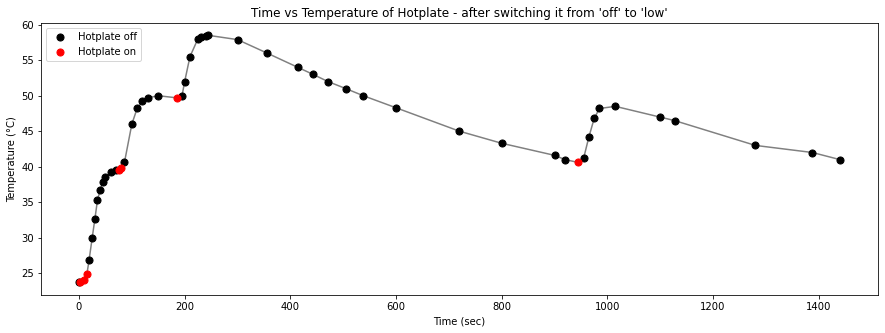

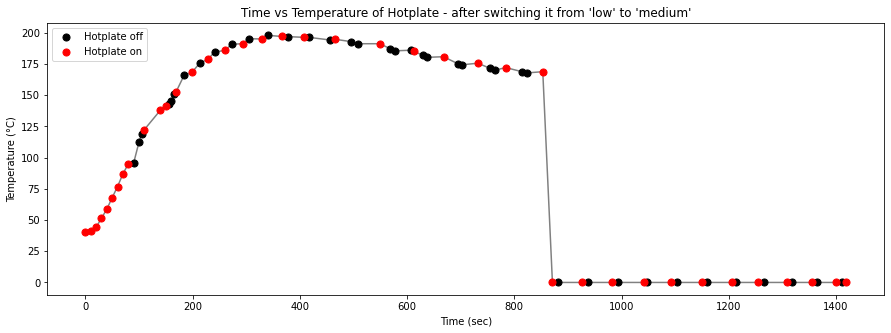

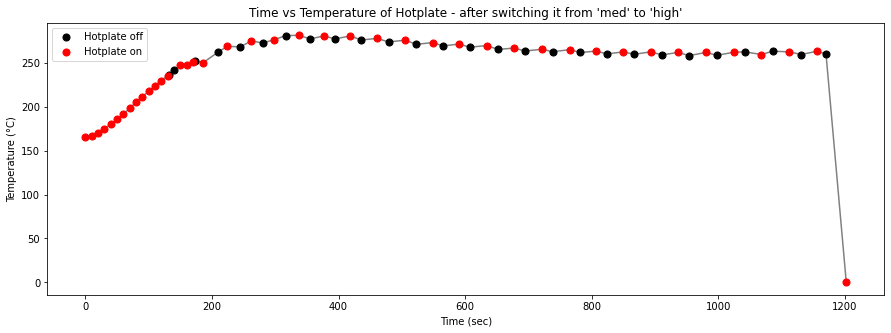

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]

onOffPlot(offLow, "Time vs Temperature of Hotplate - after switching it from 'off' to 'low'")
onOffPlot(lowMed, "Time vs Temperature of Hotplate - after switching it from 'low' to 'medium'")
onOffPlot(medHigh, "Time vs Temperature of Hotplate - after switching it from 'med' to 'high'")

Note that the temperature drops to "zero" because I did not notice that the thermometer turns off when the temperature is stable.

In [34]:
def timeIntervals(data, time=0):
    timeChunks0 = []
    timeChunks1 = []
    onOffStatus = 0
    for i in list(range(len(data[0]))):
        row = [data[0][i], data[1][i], data[2][i]]
        if onOffStatus != row[1] or i == len(data[0]) - 1:
            timeChunks0.append(row[0] - time)
            timeChunks1.append(onOffStatus)
            time = row[0]            
            onOffStatus = row[1]
    return [timeChunks0, timeChunks1]

def timeIntParse(timeInt):
    #splits the results from timeIntervals() into two lists based on the on/off status
    offX = []
    offY = []
    onX = []
    onY = []
    for i in list(range(len(timeInt[0]))):
        row = [timeInt[0][i], timeInt[1][i]]
        if row[1] == 0:
            offX.append(i + 1)
            offY.append(row[0])
        if row[1] == 1:
            onX.append(i + 1)
            onY.append(row[0])
    return [[offX, offY],[onX, onY]]

def timeIntPlot(data, title="Time of On/Off Intervals of Hotplate", time=0):
    #plots the on and off time intervals as bar graphs
    dataParse = timeIntParse(timeIntervals(data, time))
    #plt.show()
    f = plt.figure()
    ax = f.add_axes([0,0,1,1])
    ax.bar(dataParse[0][0], dataParse[0][1], color='black', label="Hotplate off")
    ax.bar(dataParse[1][0], dataParse[1][1], color='red', label="Hotplate on")
    plt.legend(loc="upper left")
    plt.xlabel("Intervals")
    plt.ylabel("Time (sec)")
    plt.title(title)
    f.savefig(str(title) + ".pdf", bbox_inches='tight')

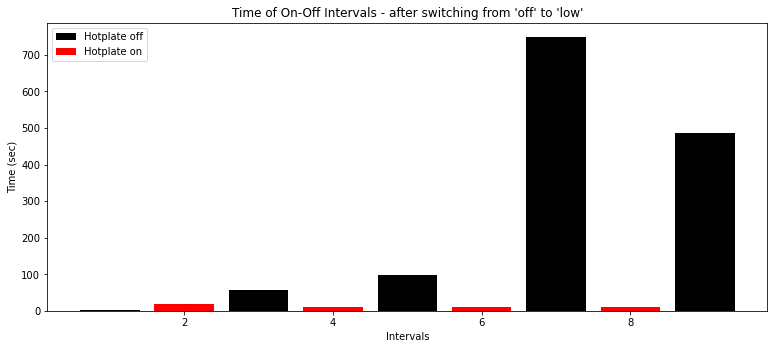

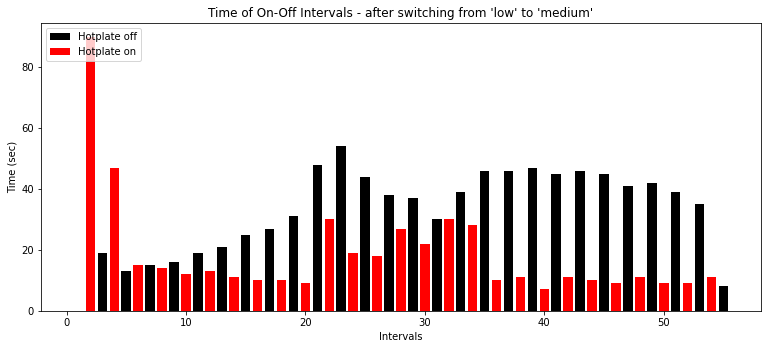

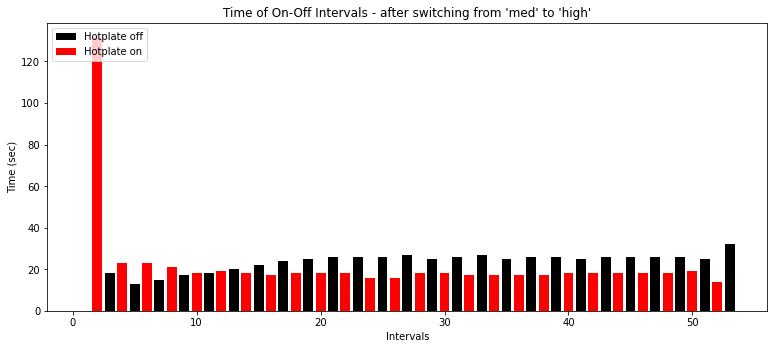

In [37]:
plt.rcParams['figure.figsize'] = [10, 4]
timeIntPlot(offLow, "Time of On-Off Intervals - after switching from 'off' to 'low'")
timeIntPlot(lowMed, "Time of On-Off Intervals - after switching from 'low' to 'medium'")
timeIntPlot(medHigh, "Time of On-Off Intervals - after switching from 'med' to 'high'")